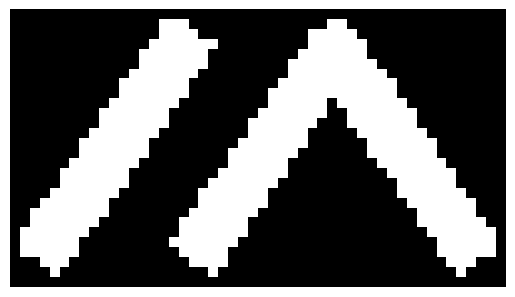

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la imagen
icon_width = 50
icon_height = 28

# Datos en formato XBM
icon_bits = [
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x80, 0x03, 0x00, 0x03, 
    0x00, 0x00, 0x00, 0x80, 0x07, 0xC0, 0x07, 0x00, 0x00, 0x00, 0xC0, 0x1F, 
    0xC0, 0x0F, 0x00, 0x00, 0x00, 0xE0, 0x0F, 0xE0, 0x0F, 0x00, 0x00, 0x00, 
    0xE0, 0x0F, 0xF0, 0x1F, 0x00, 0x00, 0x00, 0xF0, 0x07, 0xF0, 0x3F, 0x00, 
    0x00, 0x00, 0xF8, 0x03, 0xF8, 0x7F, 0x00, 0x00, 0x00, 0xF8, 0x03, 0xFC, 
    0x7F, 0x00, 0x00, 0x00, 0xFC, 0x01, 0xFC, 0xFE, 0x00, 0x00, 0x00, 0xFE, 
    0x00, 0xFE, 0xFC, 0x01, 0x00, 0x00, 0xFE, 0x00, 0x7F, 0xFC, 0x01, 0x00, 
    0x00, 0x7F, 0x00, 0x3F, 0xF8, 0x03, 0x00, 0x80, 0x3F, 0x80, 0x3F, 0xF0, 
    0x07, 0x00, 0x80, 0x3F, 0xC0, 0x1F, 0xF0, 0x07, 0x00, 0xC0, 0x1F, 0xC0, 
    0x0F, 0xE0, 0x0F, 0x00, 0xE0, 0x0F, 0xE0, 0x0F, 0xC0, 0x1F, 0x00, 0xE0, 
    0x0F, 0xF0, 0x07, 0x80, 0x1F, 0x00, 0xF0, 0x07, 0xF8, 0x03, 0x80, 0x3F, 
    0x00, 0xF8, 0x03, 0xF8, 0x03, 0x00, 0x7F, 0x00, 0xFC, 0x03, 0xFC, 0x01, 
    0x00, 0x7E, 0x00, 0xFC, 0x01, 0xFE, 0x00, 0x00, 0xFE, 0x00, 0xFE, 0x00, 
    0xFE, 0x00, 0x00, 0xFC, 0x01, 0x7E, 0x00, 0x7F, 0x00, 0x00, 0xF8, 0x01, 
    0x7E, 0x00, 0x3E, 0x00, 0x00, 0xF8, 0x01, 0x38, 0x00, 0x3C, 0x00, 0x00, 
    0x70, 0x00, 0x10, 0x00, 0x10, 0x00, 0x00, 0x20, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00
]


# Convertir XBM a matriz de píxeles
width_bytes = (icon_width + 7) // 8
data = np.zeros((icon_height, icon_width), dtype=np.uint8)

for y in range(icon_height):
    for x in range(icon_width):
        byte_index = y * width_bytes + x // 8
        bit_index = x % 8
        if (icon_bits[byte_index] >> bit_index) & 1:
            data[y, x] = 1

# Mostrar la imagen
plt.imshow(data, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.show()

In [4]:
from PIL import Image

# Parámetros de la imagen
icon_width = 50
icon_height = 28

# Cargar la imagen BMP y convertir a escala de grises
image = Image.open("d:\onedrive\proyectos\meshtastic/art.png").convert("L")

# Redimensionar la imagen a las dimensiones deseadas
image = image.resize((icon_width, icon_height))

# Convertir la imagen en una matriz binaria (0 para blanco, 1 para negro)
binary_image = np.array(image) > 128  # Asumimos que los píxeles más oscuros son los que deben ser 1

# Convertir la matriz binaria a formato XBM
width_bytes = (icon_width + 7) // 8


In [5]:
icon_bits = []

for y in range(icon_height):
    row = 0
    for x in range(icon_width):
        # Asegurarse de colocar el bit más significativo a la izquierda (como en XBM)
        if binary_image[y, x]:
            row |= (binary_image[y, x] << (x % 8))  # Cambia (7 - (x % 8)) por (x % 8)
        if (x + 1) % 8 == 0 or x == icon_width - 1:  # Cada 8 bits, se guarda la fila
            icon_bits.append(row)
            row = 0  # Resetear fila


# Convertir a array de numpy para usarlo con el código original
icon_bits = np.array(icon_bits, dtype=np.uint8)

for byte in icon_bits:
    print(f"0x{byte:02X},", end=" ")

0x00, 0x8C, 0x01, 0x00, 0x00, 0x00, 0x00, 0x00, 0x88, 0x01, 0x00, 0x00, 0x00, 0x00, 0x00, 0x48, 0x02, 0x00, 0x00, 0x00, 0x00, 0x00, 0x48, 0x02, 0x00, 0x00, 0x00, 0x00, 0x40, 0xC8, 0x03, 0x00, 0x00, 0x00, 0x00, 0x80, 0x68, 0x06, 0x00, 0x00, 0x00, 0x00, 0x90, 0x28, 0x04, 0x00, 0x00, 0x00, 0x00, 0xA0, 0x08, 0x00, 0x00, 0x00, 0x00, 0x00, 0xA0, 0x0E, 0x00, 0x00, 0x00, 0x00, 0x00, 0xA0, 0xE7, 0x01, 0x00, 0x00, 0x00, 0x00, 0xE0, 0x2B, 0x02, 0x00, 0x00, 0x00, 0x00, 0xE0, 0x2C, 0x02, 0x00, 0x00, 0x00, 0x00, 0x30, 0x2F, 0x02, 0x00, 0x00, 0x00, 0x00, 0x9C, 0xEF, 0x01, 0x00, 0x00, 0x00, 0x00, 0xE6, 0x2F, 0x02, 0x00, 0x00, 0x00, 0x00, 0xF0, 0x2F, 0x02, 0x00, 0x00, 0x00, 0x00, 0xFC, 0x2F, 0x02, 0x00, 0x00, 0x00, 0x00, 0xFE, 0x0F, 0x00, 0x00, 0x00, 0x00, 0x00, 0xFE, 0x0F, 0x00, 0x00, 0x00, 0x00, 0x00, 0xFC, 0xEF, 0x03, 0x00, 0x00, 0x00, 0x00, 0xFC, 0x8F, 0x00, 0x00, 0x00, 0x00, 0x00, 0xF8, 0x8F, 0x00, 0x00, 0x00, 0x00, 0x00, 0xF0, 0x8F, 0x00, 0x00, 0x00, 0x00, 0x00, 0xC0, 0x8F, 0x00, 0x00, 0x00, 0x00

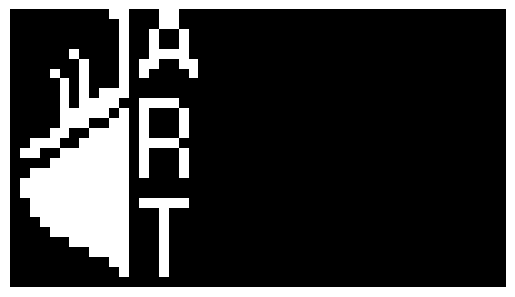

In [6]:
# Convertir XBM a matriz de píxeles
width_bytes = (icon_width + 7) // 8
data = np.zeros((icon_height, icon_width), dtype=np.uint8)

for y in range(icon_height):
    for x in range(icon_width):
        byte_index = y * width_bytes + x // 8
        bit_index = x % 8
        if (icon_bits[byte_index] >> bit_index) & 1:
            data[y, x] = 1

# Mostrar la imagen
plt.imshow(data, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.show()